## Big Data Analytics (NLP) M508
### Final Assignment
### Adolfo Mier y Teran Ruschke - GH1020379

### Problem Statement

I am an experienced Data Scientist working for a consulting company developing a project for the education system in USA on which we detect and predict whether the tweets the students write contain (or not) cyberbullying in them.

We aim to create a Machine Learning model on which we can predict from the words of every tweet if they have cyberbullying with them, and what type of cyberbullying it is related to (religion, age, gender, ethnicity), and also if they are not related to cyberbullying. Our strategy will follow training a NLP model building a ML pipeline that contains all the steps necessary for it to be optimal.

We are going to train our model using a public dataset that contains 47,000 tweets from Kaggle which can be found under this url:
https://www.kaggle.com/datasets/andrewmvd/cyberbullying-classification

No copyright infringement intended.


### Import libraries

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from IPython import display


### Import dataset

In [18]:
#https://www.kaggle.com/datasets/andrewmvd/cyberbullying-classification
cyberbullying_tweets = pd.read_csv('/Users/adolfomytr/Documents/Alemania/Master/GISMA/Materias/natural_language_processing/cyberbullying_tweets.csv')
cyberbullying_tweets.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


### Check balance of target label

We can identify in this step that the target label is balanced and therefore we won't have to apply any balanced (over/under sampling) techniques.

In [19]:
cyberbullying_tweets['cyberbullying_type'].value_counts(normalize=True)

religion               0.167701
age                    0.167575
gender                 0.167177
ethnicity              0.166925
not_cyberbullying      0.166590
other_cyberbullying    0.164032
Name: cyberbullying_type, dtype: float64

### Data preprocessing

We are going to perform 4 steps to preprocess the text data that are within each tweet for the model the perform.
1. Remove punctuation
2. Convert to lowercase
3. Remove stopwords
4. Lemmatization

1. Remove punctuation from tweets

In [20]:
#Define function that will remove the punctuation
def remove_punct(text):
    review_without_punct = ''.join([char for char in text if char not in string.punctuation])
    return review_without_punct

#Apply the function
cyberbullying_tweets['text_wo_punct'] = cyberbullying_tweets['tweet_text'].astype(str).apply(lambda x: remove_punct(x))
cyberbullying_tweets.head()

,tweet_text,cyberbullying_type,text_wo_punct
0,"In other words #katandandre, your food was cra...",not_cyberbullying,In other words katandandre your food was crapi...
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,Why is aussietv so white MKR theblock ImACeleb...
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,XochitlSuckkks a classy whore Or more red velv...
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,JasonGio meh P thanks for the heads up but no...
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,RudhoeEnglish This is an ISIS account pretendi...


2. Convert to lowercase

In [21]:
#Define function that converts to lowercase
def convert_lowercase(text):
    return text.lower()

#Apply the function
cyberbullying_tweets['text_lowercase'] = cyberbullying_tweets['text_wo_punct'].apply(lambda x: convert_lowercase(x))
cyberbullying_tweets.head()

,tweet_text,cyberbullying_type,text_wo_punct,text_lowercase
0,"In other words #katandandre, your food was cra...",not_cyberbullying,In other words katandandre your food was crapi...,in other words katandandre your food was crapi...
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,Why is aussietv so white MKR theblock ImACeleb...,why is aussietv so white mkr theblock imaceleb...
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,XochitlSuckkks a classy whore Or more red velv...,xochitlsuckkks a classy whore or more red velv...
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,JasonGio meh P thanks for the heads up but no...,jasongio meh p thanks for the heads up but no...
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,RudhoeEnglish This is an ISIS account pretendi...,rudhoeenglish this is an isis account pretendi...


3. Remove stopwords

In [22]:
#Define a list of the stopwords in english
english_stopwords = stopwords.words('english')

#Define a function to remove stopwords
def remove_stopwords(text):
    tokens = text.split()
    new_tokens = [token for token in tokens if token not in english_stopwords]
    return ' '.join(new_tokens)

#Apply the function
cyberbullying_tweets['text_no_stopwords'] = cyberbullying_tweets['text_lowercase'].apply(lambda x: remove_stopwords(x))
cyberbullying_tweets.head()

,tweet_text,cyberbullying_type,text_wo_punct,text_lowercase,text_no_stopwords
0,"In other words #katandandre, your food was cra...",not_cyberbullying,In other words katandandre your food was crapi...,in other words katandandre your food was crapi...,words katandandre food crapilicious mkr
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,Why is aussietv so white MKR theblock ImACeleb...,why is aussietv so white mkr theblock imaceleb...,aussietv white mkr theblock imacelebrityau tod...
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,XochitlSuckkks a classy whore Or more red velv...,xochitlsuckkks a classy whore or more red velv...,xochitlsuckkks classy whore red velvet cupcakes
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,JasonGio meh P thanks for the heads up but no...,jasongio meh p thanks for the heads up but no...,jasongio meh p thanks heads concerned another ...
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,RudhoeEnglish This is an ISIS account pretendi...,rudhoeenglish this is an isis account pretendi...,rudhoeenglish isis account pretending kurdish ...


4. Lemmatize the words

In [23]:
#Define lemmatization function
def lemmatize_column(dataset, input_column, new_column):
    lemmatizer = WordNetLemmatizer()
    dataset[new_column] = dataset[input_column].apply(lambda x: lemmatizer.lemmatize(x, get_wordnet_pos(x)) if x.strip() else '')
    return dataset

#Function to determine the tag speech for lemmatization
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

cyberbullying_tweets = lemmatize_column(cyberbullying_tweets, 'text_no_stopwords', 'lemmatized_column')
cyberbullying_tweets.head()

,tweet_text,cyberbullying_type,text_wo_punct,text_lowercase,text_no_stopwords,lemmatized_column
0,"In other words #katandandre, your food was cra...",not_cyberbullying,In other words katandandre your food was crapi...,in other words katandandre your food was crapi...,words katandandre food crapilicious mkr,words katandandre food crapilicious mkr
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,Why is aussietv so white MKR theblock ImACeleb...,why is aussietv so white mkr theblock imaceleb...,aussietv white mkr theblock imacelebrityau tod...,aussietv white mkr theblock imacelebrityau tod...
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,XochitlSuckkks a classy whore Or more red velv...,xochitlsuckkks a classy whore or more red velv...,xochitlsuckkks classy whore red velvet cupcakes,xochitlsuckkks classy whore red velvet cupcakes
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,JasonGio meh P thanks for the heads up but no...,jasongio meh p thanks for the heads up but no...,jasongio meh p thanks heads concerned another ...,jasongio meh p thanks heads concerned another ...
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,RudhoeEnglish This is an ISIS account pretendi...,rudhoeenglish this is an isis account pretendi...,rudhoeenglish isis account pretending kurdish ...,rudhoeenglish isis account pretending kurdish ...


### Split into training and test set

In [24]:
y_df = cyberbullying_tweets['cyberbullying_type']
x_df = cyberbullying_tweets['lemmatized_column']

x_train, x_test, y_train, y_test = train_test_split(x_df, y_df)

### Create Bag of Words

We are going to use the Bag of Words technique to create the model

In [25]:
#CountVectorizer object
vectorizer = CountVectorizer()

#Fit and transform the model with the train set
train_feautures = vectorizer.fit_transform(x_train)
test_feautures = vectorizer.transform(x_test)

### Train the model

Create a grid for Logistic Regression

In [26]:
lr_grid = {'max_iter': [6000], 'C':[0.01, 0.1]}

Conduct the grid search to find the best model

In [27]:
lr_model = GridSearchCV(LogisticRegression(), lr_grid, cv=5, error_score='raise')

Fit the training set into each grid model

In [28]:
lr_model.fit(train_feautures, y_train)

GridSearchCV(cv=5, error_score='raise', estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1], 'max_iter': [6000]})

Evaluate best metrics

In [29]:
print('Best score Logistic Regression: ', lr_model.best_score_)
print('Best parameters Logistic Regression: ', lr_model.best_params_)

Best score Logistic Regression:  0.8330398427188384
Best parameters Logistic Regression:  {'C': 0.1, 'max_iter': 6000}


### Test the model

We use Cccuracy to test the model

In [30]:
y_predicted = lr_model.predict(test_feautures)
accuracy = accuracy_score(y_test, y_predicted)
print('Accuracy:', accuracy)

Accuracy: 0.8322569823031116


We use a confusion matrix to evaluate the performance

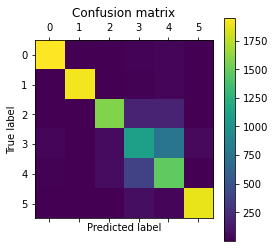

,0,1,2,3,4,5
0,1951,1,1,20,27,2
1,3,1920,6,14,38,1
2,3,7,1583,188,184,5
3,29,4,55,1104,757,48
4,12,7,67,389,1477,7
5,4,2,7,75,37,1888


In [31]:
cm = confusion_matrix(y_test, y_predicted)
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

pd.DataFrame(confusion_matrix(y_test, y_predicted))

### Submission Form

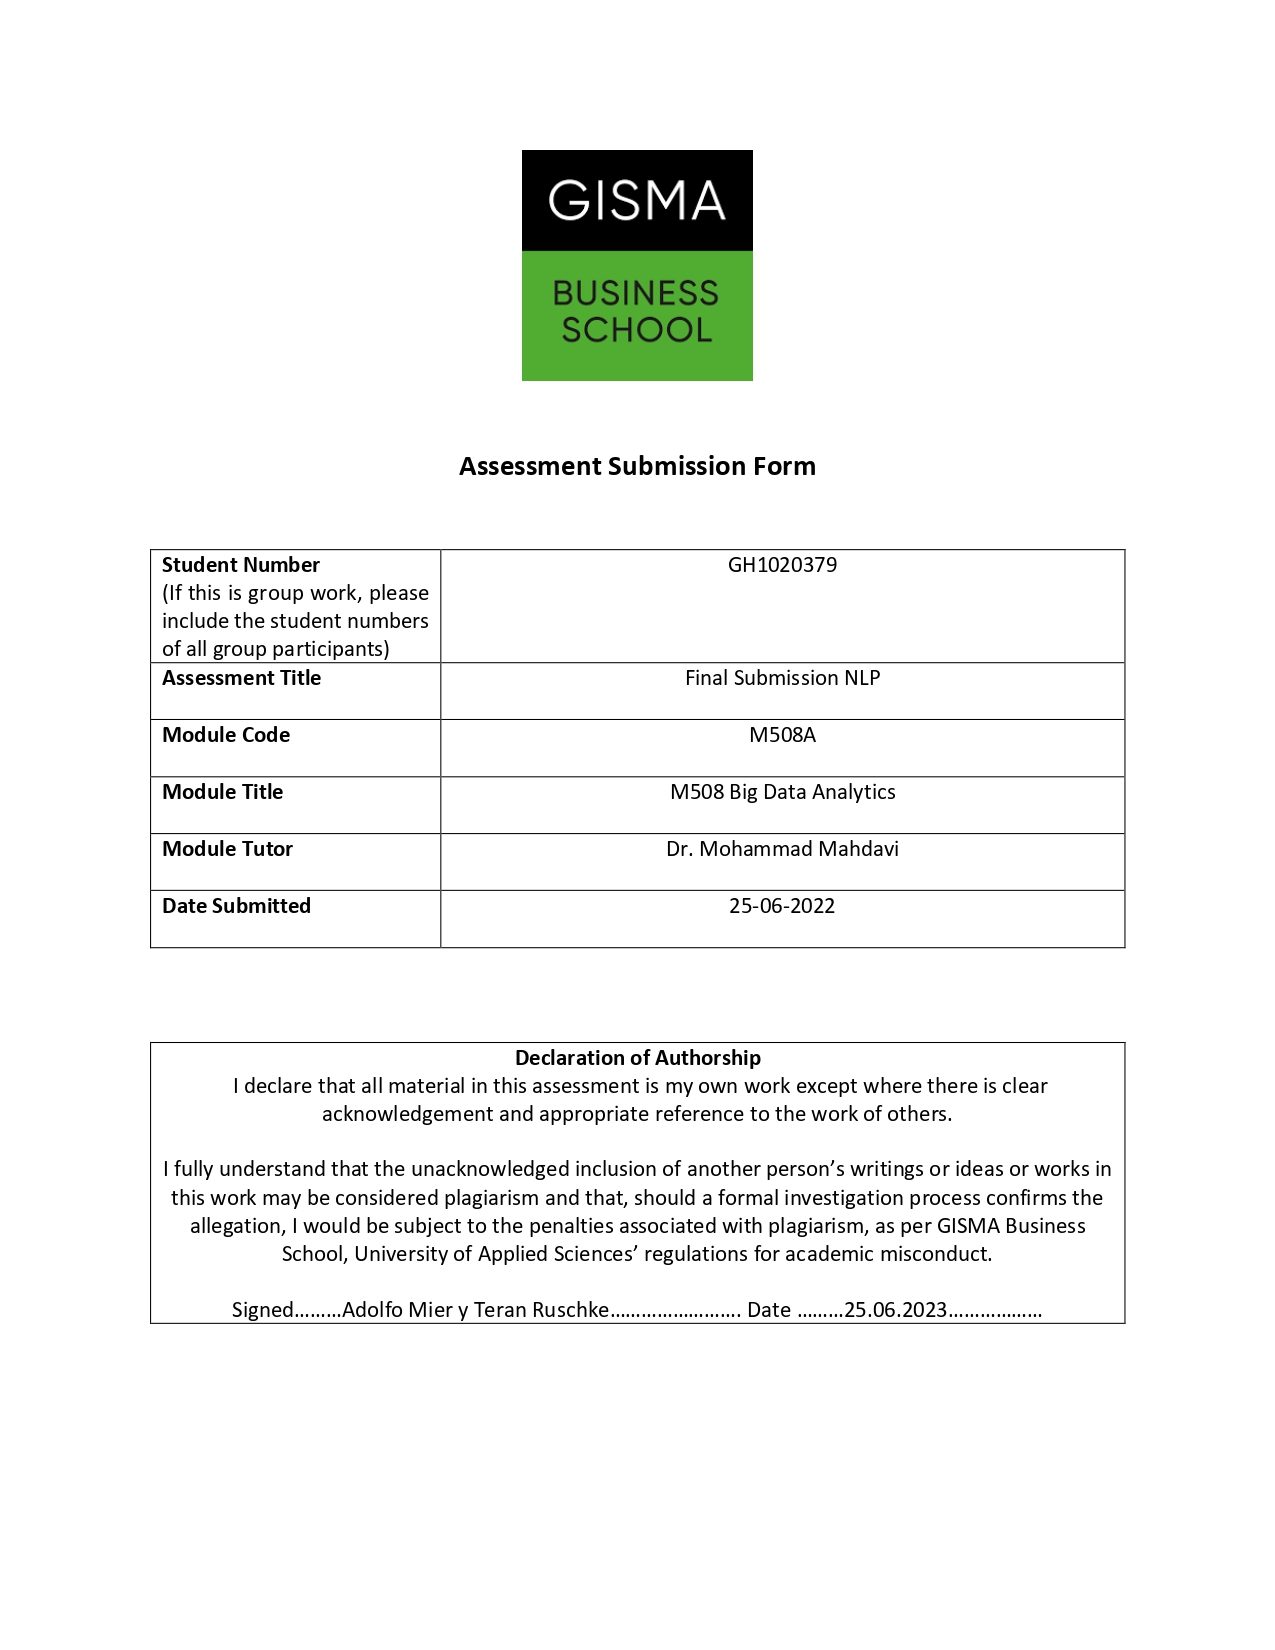

In [32]:
display.Image("/Users/adolfomytr/Documents/Alemania/Master/GISMA/Materias/natural_language_processing/Assessment_Submission_Form_NLP_page-0001.jpg", width=500, height= 650)

In [33]:
!jupyter nbconvert --to html final_assignment_nlp.ipynb

[NbConvertApp] Converting notebook final_assignment_nlp.ipynb to html
[NbConvertApp] Writing 1069825 bytes to final_assignment_nlp.html
